# CNN 

 ## Importações

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import statistics as stats

import random
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import pickle

from sklearn.model_selection import train_test_split
import sklearn

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import pandas as pd
from keras.models import model_from_json
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import stats

## Configurações

In [2]:
batch_size = 2
img_width = 128
img_height = 128
num_classes=9
image_count = 711


## Importando dataset

In [3]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

## Separando Dataset

In [4]:
x_val = np.asarray(X[0:123])
y_val = np.asarray(y[0:123])
x_train = np.asarray(X[124:710])
y_train = np.asarray(y[124:710])

## Modelo com Augumentation

In [5]:
data_augumentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal_and_vertical",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
      
    layers.RandomRotation(30, fill_mode='reflect',
    interpolation='bilinear',),
    layers.RandomZoom(0.2),
  ]
)

model_augumentation = Sequential([
    data_augumentation,
    layers.Conv2D(16,3, kernel_regularizer=keras.regularizers.l2(0.001), input_shape=(128,128,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(32,3, kernel_regularizer=keras.regularizers.l2(0.001), input_shape=(128,128,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64,3, kernel_regularizer=keras.regularizers.l2(0.001), input_shape=(128,128,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(256, kernel_regularizer=keras.regularizers.l2(0.001), activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, kernel_regularizer=keras.regularizers.l2(0.001), activation='selu'),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation='softmax')
], name='augumentation_2CL')


## Treinando com Augumentation

In [6]:
#Compilando
model_augumentation.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=[tf.metrics.SparseCategoricalAccuracy()])

#Checkpoints
checkpoint_filepath = './checkpoints/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_sparse_categorical_accuracy',
    mode='max',
    save_best_only=True)

#Treinando
epochs = 1000

history_augumentation = model_augumentation.fit(x=x_train, y=y_train, validation_data=(x_val, y_val), batch_size = batch_size, epochs=epochs, callbacks=[model_checkpoint_callback])

#Carregando checkpoint
model_augumentation.load_weights(checkpoint_filepath)

model_augumentation.summary()

Epoch 1/1000
293/293 [==============================] - 5s 10ms/step - loss: 6.6262 - sparse_categorical_accuracy: 0.2509 - val_loss: 2.4922 - val_sparse_categorical_accuracy: 0.4146
Epoch 2/1000
293/293 [==============================] - 2s 8ms/step - loss: 2.2043 - sparse_categorical_accuracy: 0.3294 - val_loss: 2.1539 - val_sparse_categorical_accuracy: 0.3089
Epoch 3/1000
293/293 [==============================] - 2s 8ms/step - loss: 2.2053 - sparse_categorical_accuracy: 0.3072 - val_loss: 2.5573 - val_sparse_categorical_accuracy: 0.1789
Epoch 4/1000
293/293 [==============================] - 2s 8ms/step - loss: 2.0395 - sparse_categorical_accuracy: 0.3532 - val_loss: 1.9829 - val_sparse_categorical_accuracy: 0.3089
Epoch 5/1000
293/293 [==============================] - 2s 8ms/step - loss: 1.9641 - sparse_categorical_accuracy: 0.3908 - val_loss: 2.0725 - val_sparse_categorical_accuracy: 0.3333
Epoch 6/1000
293/293 [==============================] - 3s 9ms/step - loss: 1.8363 - spar

Epoch 46/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.8126 - sparse_categorical_accuracy: 0.7867 - val_loss: 0.5814 - val_sparse_categorical_accuracy: 0.8374
Epoch 47/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.6874 - sparse_categorical_accuracy: 0.8379 - val_loss: 0.8246 - val_sparse_categorical_accuracy: 0.7886
Epoch 48/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.7279 - sparse_categorical_accuracy: 0.7935 - val_loss: 0.7747 - val_sparse_categorical_accuracy: 0.8049
Epoch 49/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.7139 - sparse_categorical_accuracy: 0.8055 - val_loss: 0.7049 - val_sparse_categorical_accuracy: 0.7642
Epoch 50/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.6297 - sparse_categorical_accuracy: 0.8413 - val_loss: 0.5998 - val_sparse_categorical_accuracy: 0.8455
Epoch 51/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.7095 -

Epoch 91/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.6007 - sparse_categorical_accuracy: 0.8532 - val_loss: 0.3908 - val_sparse_categorical_accuracy: 0.9350
Epoch 92/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.4631 - sparse_categorical_accuracy: 0.8959 - val_loss: 0.5328 - val_sparse_categorical_accuracy: 0.9024
Epoch 93/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.5592 - sparse_categorical_accuracy: 0.8805 - val_loss: 0.3559 - val_sparse_categorical_accuracy: 0.9106
Epoch 94/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.5752 - sparse_categorical_accuracy: 0.8754 - val_loss: 0.4207 - val_sparse_categorical_accuracy: 0.9431
Epoch 95/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.6535 - sparse_categorical_accuracy: 0.8413 - val_loss: 0.4112 - val_sparse_categorical_accuracy: 0.9350
Epoch 96/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.7205 -

293/293 [==============================] - 2s 8ms/step - loss: 0.5195 - sparse_categorical_accuracy: 0.9010 - val_loss: 0.4589 - val_sparse_categorical_accuracy: 0.9268
Epoch 136/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.5554 - sparse_categorical_accuracy: 0.8737 - val_loss: 0.3728 - val_sparse_categorical_accuracy: 0.9431
Epoch 137/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.4658 - sparse_categorical_accuracy: 0.9027 - val_loss: 0.3885 - val_sparse_categorical_accuracy: 0.9350
Epoch 138/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.5218 - sparse_categorical_accuracy: 0.8840 - val_loss: 0.4551 - val_sparse_categorical_accuracy: 0.8862
Epoch 139/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.5722 - sparse_categorical_accuracy: 0.8788 - val_loss: 0.7156 - val_sparse_categorical_accuracy: 0.8211
Epoch 140/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.5358 - sparse_c

293/293 [==============================] - 2s 8ms/step - loss: 0.4648 - sparse_categorical_accuracy: 0.9044 - val_loss: 0.5542 - val_sparse_categorical_accuracy: 0.8780
Epoch 180/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.4214 - sparse_categorical_accuracy: 0.9249 - val_loss: 0.3197 - val_sparse_categorical_accuracy: 0.9512
Epoch 181/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.5160 - sparse_categorical_accuracy: 0.8959 - val_loss: 0.3808 - val_sparse_categorical_accuracy: 0.9350
Epoch 182/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.3855 - sparse_categorical_accuracy: 0.9403 - val_loss: 0.7191 - val_sparse_categorical_accuracy: 0.8374
Epoch 183/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.6111 - sparse_categorical_accuracy: 0.8669 - val_loss: 0.4343 - val_sparse_categorical_accuracy: 0.8943
Epoch 184/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.4434 - sparse_c

293/293 [==============================] - 2s 8ms/step - loss: 0.4104 - sparse_categorical_accuracy: 0.9283 - val_loss: 0.4598 - val_sparse_categorical_accuracy: 0.9187
Epoch 224/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.5882 - sparse_categorical_accuracy: 0.8737 - val_loss: 0.3110 - val_sparse_categorical_accuracy: 0.9675
Epoch 225/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.4718 - sparse_categorical_accuracy: 0.9130 - val_loss: 0.3680 - val_sparse_categorical_accuracy: 0.9512
Epoch 226/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.5199 - sparse_categorical_accuracy: 0.8942 - val_loss: 0.3603 - val_sparse_categorical_accuracy: 0.9431
Epoch 227/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.4885 - sparse_categorical_accuracy: 0.9130 - val_loss: 0.3989 - val_sparse_categorical_accuracy: 0.9187
Epoch 228/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.5250 - sparse_c

293/293 [==============================] - 2s 8ms/step - loss: 0.4169 - sparse_categorical_accuracy: 0.9334 - val_loss: 0.4087 - val_sparse_categorical_accuracy: 0.9268
Epoch 268/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.4158 - sparse_categorical_accuracy: 0.9215 - val_loss: 0.4160 - val_sparse_categorical_accuracy: 0.8943
Epoch 269/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.4345 - sparse_categorical_accuracy: 0.9249 - val_loss: 0.3098 - val_sparse_categorical_accuracy: 0.9512
Epoch 270/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.4160 - sparse_categorical_accuracy: 0.9181 - val_loss: 0.2748 - val_sparse_categorical_accuracy: 0.9756
Epoch 271/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.5379 - sparse_categorical_accuracy: 0.8737 - val_loss: 0.3957 - val_sparse_categorical_accuracy: 0.9106
Epoch 272/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.4050 - sparse_c

293/293 [==============================] - 2s 8ms/step - loss: 0.5039 - sparse_categorical_accuracy: 0.8942 - val_loss: 0.6139 - val_sparse_categorical_accuracy: 0.8455
Epoch 312/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.4730 - sparse_categorical_accuracy: 0.9096 - val_loss: 0.4038 - val_sparse_categorical_accuracy: 0.9431
Epoch 313/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.4182 - sparse_categorical_accuracy: 0.9266 - val_loss: 0.3351 - val_sparse_categorical_accuracy: 0.9431
Epoch 314/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.4178 - sparse_categorical_accuracy: 0.9300 - val_loss: 0.3711 - val_sparse_categorical_accuracy: 0.9350
Epoch 315/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.6174 - sparse_categorical_accuracy: 0.8874 - val_loss: 0.8438 - val_sparse_categorical_accuracy: 0.8130
Epoch 316/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.4765 - sparse_c

293/293 [==============================] - 2s 8ms/step - loss: 0.4308 - sparse_categorical_accuracy: 0.9317 - val_loss: 0.5258 - val_sparse_categorical_accuracy: 0.9024
Epoch 356/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.5521 - sparse_categorical_accuracy: 0.8788 - val_loss: 0.5727 - val_sparse_categorical_accuracy: 0.8618
Epoch 357/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.3682 - sparse_categorical_accuracy: 0.9386 - val_loss: 0.4254 - val_sparse_categorical_accuracy: 0.9106
Epoch 358/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.4215 - sparse_categorical_accuracy: 0.9266 - val_loss: 0.3664 - val_sparse_categorical_accuracy: 0.9187
Epoch 359/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.4280 - sparse_categorical_accuracy: 0.9096 - val_loss: 0.7284 - val_sparse_categorical_accuracy: 0.8049
Epoch 360/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.4998 - sparse_c

293/293 [==============================] - 2s 8ms/step - loss: 0.4840 - sparse_categorical_accuracy: 0.9044 - val_loss: 0.3543 - val_sparse_categorical_accuracy: 0.9431
Epoch 400/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.4331 - sparse_categorical_accuracy: 0.9181 - val_loss: 0.5762 - val_sparse_categorical_accuracy: 0.8374
Epoch 401/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.4105 - sparse_categorical_accuracy: 0.9352 - val_loss: 0.2961 - val_sparse_categorical_accuracy: 0.9675
Epoch 402/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.4952 - sparse_categorical_accuracy: 0.9078 - val_loss: 0.6385 - val_sparse_categorical_accuracy: 0.8862
Epoch 403/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.4625 - sparse_categorical_accuracy: 0.8959 - val_loss: 0.4509 - val_sparse_categorical_accuracy: 0.8862
Epoch 404/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.5403 - sparse_c

293/293 [==============================] - 2s 8ms/step - loss: 0.3772 - sparse_categorical_accuracy: 0.9437 - val_loss: 0.4157 - val_sparse_categorical_accuracy: 0.9268
Epoch 444/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.4450 - sparse_categorical_accuracy: 0.9249 - val_loss: 0.6052 - val_sparse_categorical_accuracy: 0.8699
Epoch 445/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.4627 - sparse_categorical_accuracy: 0.9181 - val_loss: 0.7154 - val_sparse_categorical_accuracy: 0.8537
Epoch 446/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.4528 - sparse_categorical_accuracy: 0.9147 - val_loss: 0.2984 - val_sparse_categorical_accuracy: 0.9593
Epoch 447/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.4059 - sparse_categorical_accuracy: 0.9300 - val_loss: 0.3817 - val_sparse_categorical_accuracy: 0.9187
Epoch 448/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.4982 - sparse_c

293/293 [==============================] - 2s 8ms/step - loss: 0.4845 - sparse_categorical_accuracy: 0.9232 - val_loss: 0.3973 - val_sparse_categorical_accuracy: 0.9350
Epoch 488/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.3829 - sparse_categorical_accuracy: 0.9300 - val_loss: 0.5577 - val_sparse_categorical_accuracy: 0.8943
Epoch 489/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.3989 - sparse_categorical_accuracy: 0.9420 - val_loss: 0.3609 - val_sparse_categorical_accuracy: 0.9106
Epoch 490/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.4705 - sparse_categorical_accuracy: 0.9215 - val_loss: 0.3850 - val_sparse_categorical_accuracy: 0.9187
Epoch 491/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.3629 - sparse_categorical_accuracy: 0.9334 - val_loss: 0.2822 - val_sparse_categorical_accuracy: 0.9593
Epoch 492/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.5079 - sparse_c

293/293 [==============================] - 2s 8ms/step - loss: 0.3717 - sparse_categorical_accuracy: 0.9471 - val_loss: 0.3558 - val_sparse_categorical_accuracy: 0.9512
Epoch 532/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.3908 - sparse_categorical_accuracy: 0.9386 - val_loss: 0.3883 - val_sparse_categorical_accuracy: 0.9268
Epoch 533/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.4467 - sparse_categorical_accuracy: 0.9164 - val_loss: 0.4559 - val_sparse_categorical_accuracy: 0.9268
Epoch 534/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.3538 - sparse_categorical_accuracy: 0.9488 - val_loss: 0.4307 - val_sparse_categorical_accuracy: 0.9024
Epoch 535/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.4941 - sparse_categorical_accuracy: 0.8908 - val_loss: 0.4324 - val_sparse_categorical_accuracy: 0.8780
Epoch 536/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.4575 - sparse_c

293/293 [==============================] - 2s 8ms/step - loss: 0.4939 - sparse_categorical_accuracy: 0.8925 - val_loss: 0.6629 - val_sparse_categorical_accuracy: 0.9106
Epoch 576/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.3991 - sparse_categorical_accuracy: 0.9215 - val_loss: 0.3471 - val_sparse_categorical_accuracy: 0.9431
Epoch 577/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.4927 - sparse_categorical_accuracy: 0.9130 - val_loss: 0.8105 - val_sparse_categorical_accuracy: 0.8293
Epoch 578/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.4535 - sparse_categorical_accuracy: 0.9317 - val_loss: 0.4750 - val_sparse_categorical_accuracy: 0.9187
Epoch 579/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.3818 - sparse_categorical_accuracy: 0.9420 - val_loss: 0.3281 - val_sparse_categorical_accuracy: 0.9593
Epoch 580/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.4977 - sparse_c

293/293 [==============================] - 2s 8ms/step - loss: 0.4320 - sparse_categorical_accuracy: 0.9164 - val_loss: 0.3164 - val_sparse_categorical_accuracy: 0.9675
Epoch 620/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.5715 - sparse_categorical_accuracy: 0.8959 - val_loss: 0.4833 - val_sparse_categorical_accuracy: 0.9106
Epoch 621/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.4177 - sparse_categorical_accuracy: 0.9198 - val_loss: 0.3357 - val_sparse_categorical_accuracy: 0.9431
Epoch 622/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.4183 - sparse_categorical_accuracy: 0.9352 - val_loss: 0.3163 - val_sparse_categorical_accuracy: 0.9431
Epoch 623/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.3989 - sparse_categorical_accuracy: 0.9317 - val_loss: 0.3530 - val_sparse_categorical_accuracy: 0.9187
Epoch 624/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.3341 - sparse_c

293/293 [==============================] - 3s 9ms/step - loss: 0.5452 - sparse_categorical_accuracy: 0.8857 - val_loss: 0.5097 - val_sparse_categorical_accuracy: 0.9024
Epoch 664/1000
293/293 [==============================] - 3s 9ms/step - loss: 0.4004 - sparse_categorical_accuracy: 0.9317 - val_loss: 0.4090 - val_sparse_categorical_accuracy: 0.9350
Epoch 665/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.4503 - sparse_categorical_accuracy: 0.9044 - val_loss: 0.2788 - val_sparse_categorical_accuracy: 0.9675
Epoch 666/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.3902 - sparse_categorical_accuracy: 0.9352 - val_loss: 0.2683 - val_sparse_categorical_accuracy: 0.9675
Epoch 667/1000
293/293 [==============================] - 3s 9ms/step - loss: 0.5227 - sparse_categorical_accuracy: 0.8959 - val_loss: 0.3556 - val_sparse_categorical_accuracy: 0.9268
Epoch 668/1000
293/293 [==============================] - 3s 9ms/step - loss: 0.5264 - sparse_c

293/293 [==============================] - 2s 8ms/step - loss: 0.5904 - sparse_categorical_accuracy: 0.8823 - val_loss: 0.4732 - val_sparse_categorical_accuracy: 0.9268
Epoch 708/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.3529 - sparse_categorical_accuracy: 0.9488 - val_loss: 0.3733 - val_sparse_categorical_accuracy: 0.9106
Epoch 709/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.4052 - sparse_categorical_accuracy: 0.9386 - val_loss: 0.4056 - val_sparse_categorical_accuracy: 0.9024
Epoch 710/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.4542 - sparse_categorical_accuracy: 0.9061 - val_loss: 0.5416 - val_sparse_categorical_accuracy: 0.8699
Epoch 711/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.4219 - sparse_categorical_accuracy: 0.9164 - val_loss: 0.4553 - val_sparse_categorical_accuracy: 0.9106
Epoch 712/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.3989 - sparse_c

293/293 [==============================] - 2s 8ms/step - loss: 0.4160 - sparse_categorical_accuracy: 0.9334 - val_loss: 0.4170 - val_sparse_categorical_accuracy: 0.9106
Epoch 752/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.3185 - sparse_categorical_accuracy: 0.9573 - val_loss: 0.3252 - val_sparse_categorical_accuracy: 0.9350
Epoch 753/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.4563 - sparse_categorical_accuracy: 0.9096 - val_loss: 0.3753 - val_sparse_categorical_accuracy: 0.9187
Epoch 754/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.3394 - sparse_categorical_accuracy: 0.9488 - val_loss: 0.3417 - val_sparse_categorical_accuracy: 0.9350
Epoch 755/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.4082 - sparse_categorical_accuracy: 0.9266 - val_loss: 0.3494 - val_sparse_categorical_accuracy: 0.9593
Epoch 756/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.4948 - sparse_c

293/293 [==============================] - 2s 8ms/step - loss: 0.4014 - sparse_categorical_accuracy: 0.9215 - val_loss: 0.5037 - val_sparse_categorical_accuracy: 0.8943
Epoch 796/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.5425 - sparse_categorical_accuracy: 0.9130 - val_loss: 0.3439 - val_sparse_categorical_accuracy: 0.9756
Epoch 797/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.3383 - sparse_categorical_accuracy: 0.9573 - val_loss: 0.6260 - val_sparse_categorical_accuracy: 0.8699
Epoch 798/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.5360 - sparse_categorical_accuracy: 0.8993 - val_loss: 0.5181 - val_sparse_categorical_accuracy: 0.8943
Epoch 799/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.3366 - sparse_categorical_accuracy: 0.9471 - val_loss: 0.3682 - val_sparse_categorical_accuracy: 0.9268
Epoch 800/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.3919 - sparse_c

293/293 [==============================] - 2s 8ms/step - loss: 0.4732 - sparse_categorical_accuracy: 0.9113 - val_loss: 0.3317 - val_sparse_categorical_accuracy: 0.9512
Epoch 840/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.4017 - sparse_categorical_accuracy: 0.9454 - val_loss: 0.3008 - val_sparse_categorical_accuracy: 0.9675
Epoch 841/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.4583 - sparse_categorical_accuracy: 0.9147 - val_loss: 0.5331 - val_sparse_categorical_accuracy: 0.8943
Epoch 842/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.5230 - sparse_categorical_accuracy: 0.8976 - val_loss: 0.4363 - val_sparse_categorical_accuracy: 0.9268
Epoch 843/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.4212 - sparse_categorical_accuracy: 0.9249 - val_loss: 0.3914 - val_sparse_categorical_accuracy: 0.9350
Epoch 844/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.3885 - sparse_c

293/293 [==============================] - 2s 8ms/step - loss: 0.3695 - sparse_categorical_accuracy: 0.9403 - val_loss: 0.3232 - val_sparse_categorical_accuracy: 0.9512
Epoch 884/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.3715 - sparse_categorical_accuracy: 0.9317 - val_loss: 0.2430 - val_sparse_categorical_accuracy: 0.9837
Epoch 885/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.5045 - sparse_categorical_accuracy: 0.9113 - val_loss: 0.4620 - val_sparse_categorical_accuracy: 0.8780
Epoch 886/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.4284 - sparse_categorical_accuracy: 0.9164 - val_loss: 0.3502 - val_sparse_categorical_accuracy: 0.9512
Epoch 887/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.3884 - sparse_categorical_accuracy: 0.9300 - val_loss: 0.2840 - val_sparse_categorical_accuracy: 0.9756
Epoch 888/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.4175 - sparse_c

293/293 [==============================] - 2s 8ms/step - loss: 0.3708 - sparse_categorical_accuracy: 0.9352 - val_loss: 0.5038 - val_sparse_categorical_accuracy: 0.9268
Epoch 928/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.4369 - sparse_categorical_accuracy: 0.9249 - val_loss: 0.2531 - val_sparse_categorical_accuracy: 0.9675
Epoch 929/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.3436 - sparse_categorical_accuracy: 0.9420 - val_loss: 0.2835 - val_sparse_categorical_accuracy: 0.9512
Epoch 930/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.4304 - sparse_categorical_accuracy: 0.9198 - val_loss: 0.5758 - val_sparse_categorical_accuracy: 0.8862
Epoch 931/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.4480 - sparse_categorical_accuracy: 0.9334 - val_loss: 0.4394 - val_sparse_categorical_accuracy: 0.9268
Epoch 932/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.3598 - sparse_c

293/293 [==============================] - 2s 8ms/step - loss: 0.4389 - sparse_categorical_accuracy: 0.9181 - val_loss: 0.8319 - val_sparse_categorical_accuracy: 0.8211
Epoch 972/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.3937 - sparse_categorical_accuracy: 0.9403 - val_loss: 0.3180 - val_sparse_categorical_accuracy: 0.9431
Epoch 973/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.4159 - sparse_categorical_accuracy: 0.9386 - val_loss: 0.3599 - val_sparse_categorical_accuracy: 0.9350
Epoch 974/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.3394 - sparse_categorical_accuracy: 0.9539 - val_loss: 0.3187 - val_sparse_categorical_accuracy: 0.9350
Epoch 975/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.3675 - sparse_categorical_accuracy: 0.9420 - val_loss: 0.3027 - val_sparse_categorical_accuracy: 0.9756
Epoch 976/1000
293/293 [==============================] - 2s 8ms/step - loss: 0.4763 - sparse_c

## Carregando Modelo

In [16]:
#Carregando checkpoint
model_augumentation.load_weights('./checkpoints/checkpoint')

summary = model_augumentation.summary()

Model: "augumentation_2CL"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 32768)       

## Resultados com Augumentation

range(1, 1000)


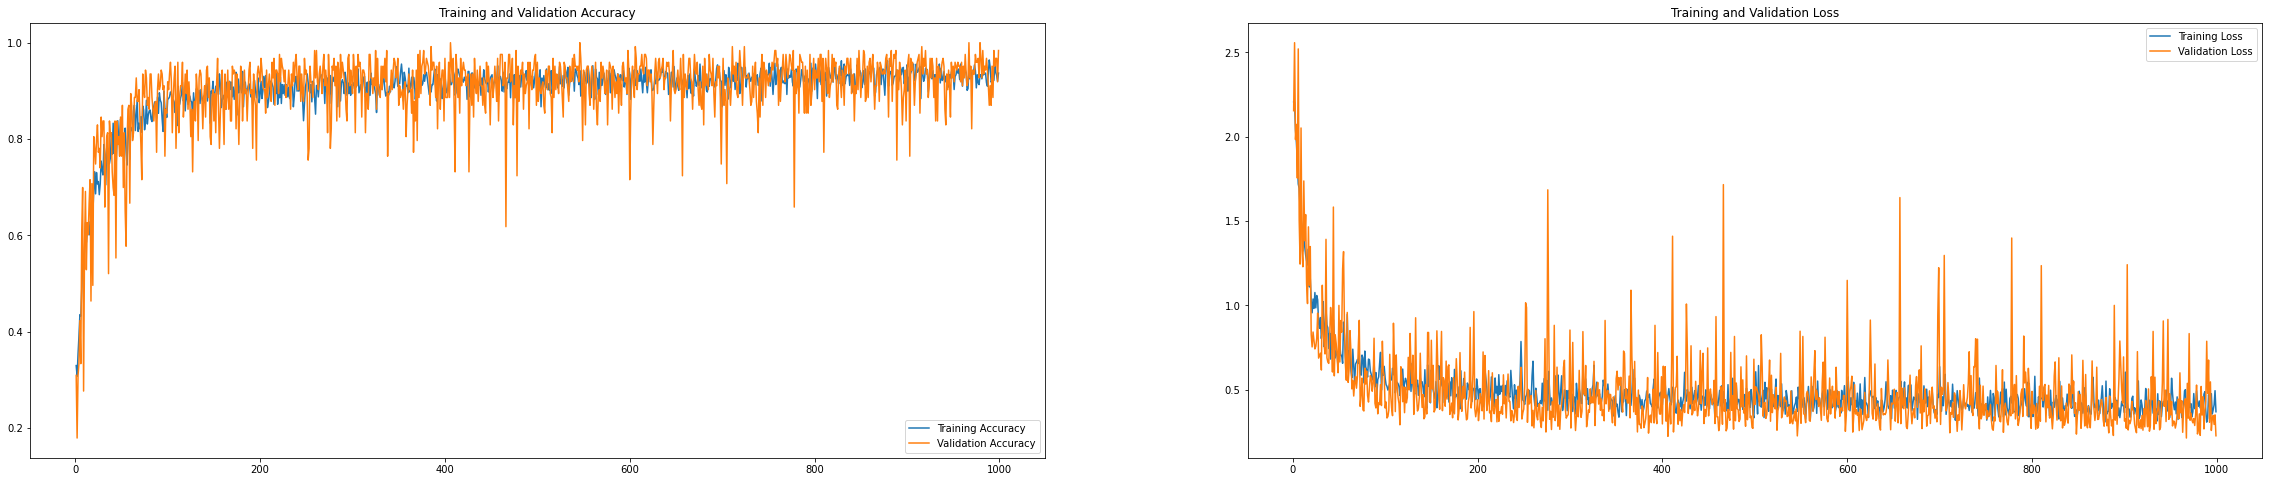

In [8]:
import statistics 

acc = history_augumentation.history['sparse_categorical_accuracy'][1:1000]
val_acc = history_augumentation.history['val_sparse_categorical_accuracy'][1:1000]

loss = history_augumentation.history['loss'][1:1000]
val_loss = history_augumentation.history['val_loss'][1:1000]

epochs_range = range(1,1000)
print(epochs_range)

plt.figure(figsize=(40, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./statistics/training_x_val.png',  dpi = 300)
plt.show()



## Evaluate

In [20]:
print("Evaluate on test data")
results = model_augumentation.evaluate(x_val, y_val, batch_size=2)
print("test loss, test acc:", results)

Evaluate on test data
62/62 [==============================] - 0s 3ms/step - loss: 0.2226 - sparse_categorical_accuracy: 1.0000
test loss, test acc: [0.22259968519210815, 1.0]


## Matriz de Confusão

In [21]:
predictions = model_augumentation.predict(x_val)
pred_labels = []
for predict in predictions:
    pred_labels.append(np.argmax(predict))
confusion_matrix = tf.math.confusion_matrix(y_val, pred_labels)
print(confusion_matrix)

tf.Tensor(
[[12  0  0  0  0  0  0  0  0]
 [ 0 12  0  0  0  0  0  0  0]
 [ 0  0 15  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0]
 [ 0  0  0  0 13  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0]
 [ 0  0  0  0  0  0  8  0  0]
 [ 0  0  0  0  0  0  0 11  0]
 [ 0  0  0  0  0  0  0  0 12]], shape=(9, 9), dtype=int32)


## Heatmap

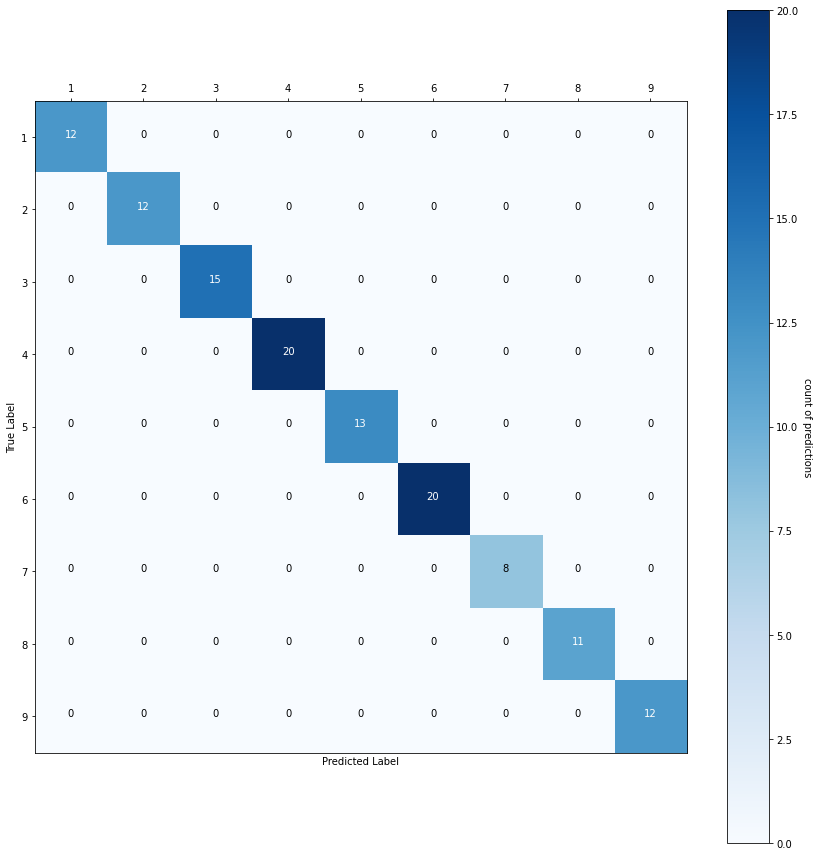

In [22]:
y_pred_classes = np.argmax(predictions, axis=1)

y_true = y_val
errors = (y_pred_classes - y_true != 0)

labels = ['1','2','3','4','5','6','7','8','9']

y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = predictions[errors]
y_true_errors = y_true[errors]
x_test_errors = []

cm = sklearn.metrics.confusion_matrix(y_true, y_pred_classes)
thresh = cm.max() / 2,

fig, ax = plt.subplots(figsize = (12, 12))
im, cbar = stats.heatmap(cm, labels, labels, ax = ax,
cmap = plt.cm.Blues, cbarlabel = 'count of predictions')

texts = stats.annotate_heatmap(im, data = cm, threshold = thresh)

fig.tight_layout()
plt.show()
fig.savefig('statistics/heatmap.png', dpi=72)

## Classification report

In [23]:
target_names = ['class 1', 'class 2', 'class 3','class 4', 'class 5', 'class 6','class 7', 'class 8', 'class 9']
classification_report = sklearn.metrics.classification_report(pred_labels, y_val, target_names=target_names)

## Salvando Relatórios

In [24]:
arq = open("./statistics/relatorio.txt", 'w')
arq.write(f"Modelo:Augumentation 2 Camadas de Convolução\n\nEvaluate:\n{results}\n\n Matriz de Confusão:\n{confusion_matrix}\n\nClassification Report:\n{classification_report}\n\n")
arq.close()